In [1]:
import numpy as np
import matplotlib.pyplot as plt
from update_utils import *
from retraction_free import *
from RDGD_tracking import *
from ret_free_destiny import *
from ret_deepca import *
import time

In [3]:
m = 500
n = 100
r = 20
eig_rank = n

exp_num = 1
# number of experiments

A = data_gen_pca(1, n, m)/np.sqrt(m)
B = np.zeros((m, n))
B = A[0].T

U, S, V = np.linalg.svd(B, full_matrices=False)
for i in range(n):
    if eig_rank >= i:
    # if True:
        S[i] = S[0] * 0.9**(i)
    else:
        S[i] = 0
B = U@np.diag(S)@V

A[0] = B.T
    
A_m = np.zeros((n,n))
for i in range(1):
    A_m += A[i]@A[i].T
    
x_opt, s, v = np.linalg.svd(A_m)
x_opt = x_opt[:, :r]

9.960024190077204
9.960024190077204
(500, 100) (100,) (100, 100)
3.274765821499836


In [5]:

    
x_0 = np.random.randn(n, r)
x_0, _ = np.linalg.qr(x_0)


step_size = .02

max_iter=50000
distances = []
con_errors = []
grad_norms = []
x_bars = []
labels = []
time_methods = [time.time()]


(100, 500)


100%|██████████| 50000/50000 [00:08<00:00, 5556.62it/s]


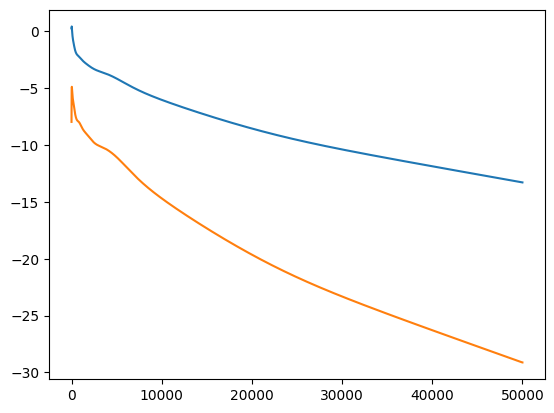

In [7]:
distance = []
con_errors = []
grad_norms = []


lambd = 0.1
beta = 1

x = np.copy(x_0)
y = np.zeros_like(x_0)
grad = np.zeros_like(x_0)
diff = np.zeros_like(x_0)
penalty = np.zeros_like(x_0)


all_start = time.time()
retraction_time = 0
communication_time = 0
gradient_time = 0
logging_time = 0


for iter in tqdm(range(max_iter)):

    diff = A[0]@A[0].T@x

    grad = proj_tangent(x, diff)
    # grad = 0
    penalty = lambd * x @ (x.T@x - np.eye(r))


    x += step_size * (grad - penalty)


    dist = np.linalg.norm(x.T@x- np.eye(r), ord='fro')  
    distance.append(dist)
    grad_norm = np.linalg.norm(grad)
    grad_norms.append(grad_norm)

time_3 = time.time() - all_start



plt.plot(np.log(grad_norms))

plt.plot(np.log(distance))



(-17.0, -5.0)

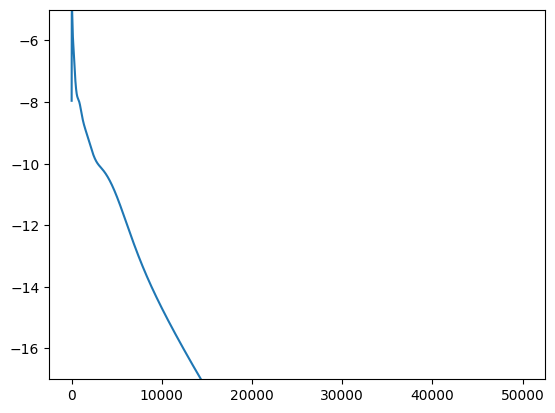

In [8]:
plt.plot(np.log(distance))
plt.ylim(-17,-5)


100%|██████████| 50000/50000 [01:05<00:00, 759.04it/s]


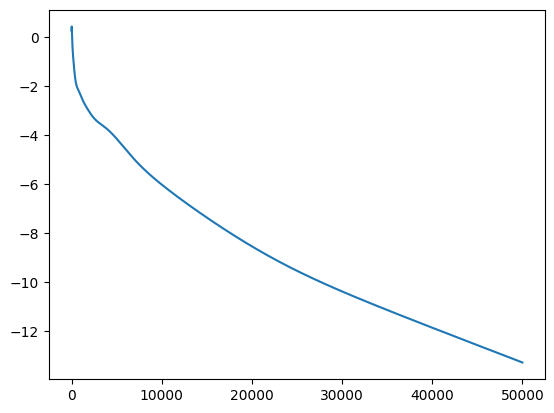

In [9]:
distance_ret = []
con_errors = []
grad_norms_ret = []


lambd = 0.1
beta = 1

x = np.copy(x_0)
y = np.zeros_like(x_0)
grad = np.zeros_like(x_0)
diff = np.zeros_like(x_0)
penalty = np.zeros_like(x_0)


all_start = time.time()
retraction_time = 0
communication_time = 0
gradient_time = 0
logging_time = 0


for iter in tqdm(range(max_iter)):

    diff = A[0]@A[0].T@x

    grad = proj_tangent(x, diff)
    # penalty = lambd * x @ (x.T@x - np.eye(r))

    x += step_size * grad
    U, S, Vh = np.linalg.svd(x, full_matrices=True)
    x = U[:,:r]@Vh
    # x += step_size * (grad - penalty)


    dist = np.linalg.norm(x.T@x- np.eye(r), ord='fro')  
    distance_ret.append(dist)
    grad_norm = np.linalg.norm(grad)
    grad_norms_ret.append(grad_norm)
    
plt.plot(np.log(grad_norms_ret))
time_1 = time.time() - all_start

# plt.plot(np.log(distance_ret))



100%|██████████| 50000/50000 [00:10<00:00, 4966.32it/s]


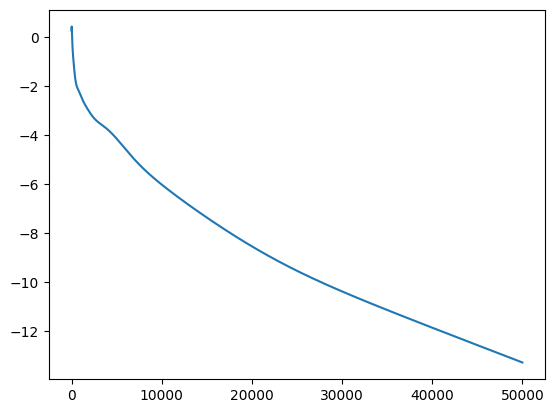

In [10]:
distance_xiao = []
con_errors = []
grad_norms_xiao = []


lambd = 0.1
beta = 1

x = np.copy(x_0)
y = np.zeros_like(x_0)
grad = np.zeros_like(x_0)
diff = np.zeros_like(x_0)
penalty = np.zeros_like(x_0)


all_start = time.time()
retraction_time = 0
communication_time = 0
gradient_time = 0
logging_time = 0


for iter in tqdm(range(max_iter)):

    y = x@(1.5 * np.eye(r) - 0.5 * x.T@x)
    diff = A[0]@A[0].T@y
    
    grad = diff @ (1.5 * np.eye(r) - 0.5 * x.T@x) - 0.5 * x @ (x.T@diff + diff.T@x)
    penalty = lambd * x @ (x.T@x - np.eye(r))
    x += step_size * (grad - penalty)


    dist = np.linalg.norm(x.T@x- np.eye(r), ord='fro')  
    distance_xiao.append(dist)
    grad_norm = np.linalg.norm(grad)
    grad_norms_xiao.append(grad_norm)
    
plt.plot(np.log(grad_norms_xiao))
time_2 = time.time() - all_start

# plt.plot(np.log(distance_xiao))



In [14]:
# plt.plot(np.log(grad_norms_ret), label="RGD with Retraction")
# plt.plot(np.log(grad_norms_xiao), label="ExPen")
# plt.plot(np.log(grad_norms), label="Landing")
# plt.legend()
# plt.show()


# plt.plot(np.log(distance_ret))
# plt.plot(np.log(distance_xiao))

# plt.plot(np.log(distance))


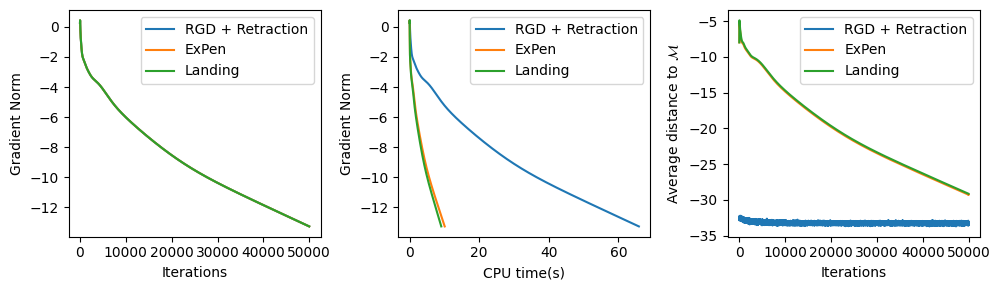

In [12]:
grad_norms_ret = np.array(grad_norms_ret)
grad_norms_xiao = np.array(grad_norms_xiao)
grad_norms = np.array(grad_norms)
f, ((ax1, ax2, ax4)) = plt.subplots(1,3, figsize=(10,3))

label1 = "RGD + Retraction"
label2 = "ExPen"
label3 = "Landing"


ax1.plot(np.log(grad_norms_ret), label=label1)
ax1.plot(np.log(grad_norms_xiao), label=label2)
ax1.plot(np.log(grad_norms), label=label3)
ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
ax1.legend()

ax2.plot(np.linspace(0, time_1, grad_norms_ret.shape[0]), np.log(grad_norms_ret), label=label1)
ax2.plot(np.linspace(0, time_2, grad_norms_xiao.shape[0]), np.log(grad_norms_xiao), label=label2)
ax2.plot(np.linspace(0, time_3, grad_norms.shape[0]), np.log(grad_norms), label=label3)
ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")
ax2.legend()

ax4.plot(np.log(distance_ret), label=label1)
ax4.plot(np.log(distance_xiao), label=label2)
ax4.plot(np.log(distance), label=label3)
ax4.set_ylabel("Average distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
# ax4.set_title("distance")
ax4.legend()

f.tight_layout()

# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.savefig("centralized_compare.pdf")

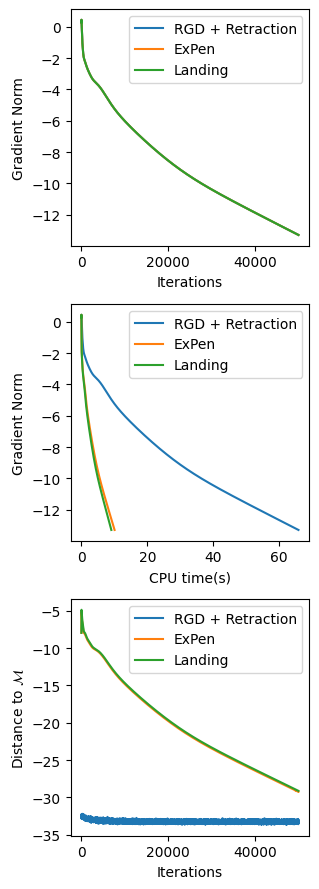

In [13]:
grad_norms_ret = np.array(grad_norms_ret)
grad_norms_xiao = np.array(grad_norms_xiao)
grad_norms = np.array(grad_norms)
f, ((ax1, ax2, ax4)) = plt.subplots(3,1, figsize=(3.5,9))

label1 = "RGD + Retraction"
label2 = "ExPen"
label3 = "Landing"


ax1.plot(np.log(grad_norms_ret), label=label1)
ax1.plot(np.log(grad_norms_xiao), label=label2)
ax1.plot(np.log(grad_norms), label=label3)
ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
ax1.legend()

ax2.plot(np.linspace(0, time_1, grad_norms_ret.shape[0]), np.log(grad_norms_ret), label=label1)
ax2.plot(np.linspace(0, time_2, grad_norms_xiao.shape[0]), np.log(grad_norms_xiao), label=label2)
ax2.plot(np.linspace(0, time_3, grad_norms.shape[0]), np.log(grad_norms), label=label3)
ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")
ax2.legend()




ax4.plot(np.log(distance_ret), label=label1)
ax4.plot(np.log(distance_xiao), label=label2)
ax4.plot(np.log(distance), label=label3)
ax4.set_ylabel("Distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
# ax4.set_title("distance")
ax4.legend()

f.tight_layout()

# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.savefig("centralized_compare_vert.pdf")